In [54]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, \
                                Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('../../data/bikes_rent.csv')

In [3]:
linreg = LinearRegression()

In [4]:
lasso = Lasso(random_state=17)
ridge = Ridge(random_state=17)
lasso_cv = LassoCV(random_state=17)
ridge_cv = RidgeCV()

In [17]:
X , y = data.drop('cnt',axis = 1).values , data['cnt'].values


In [19]:
train_part_size = int(.7 * X.shape[0])
X_train, X_valid = X[:train_part_size, :], X[train_part_size:, :]
y_train, y_valid = y[:train_part_size], y[train_part_size:]

In [22]:
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [23]:
linreg.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
np.sqrt(mean_squared_error(y_valid, linreg.predict(X_valid_scaled)))

1121.7952924380602

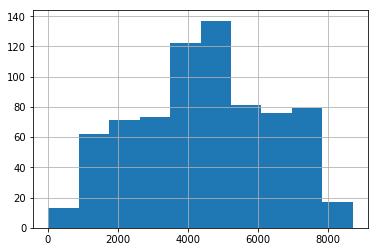

In [28]:
data['cnt'].hist();

In [31]:
pd.DataFrame(linreg.coef_,data.columns[:-1],columns=['coef']).sort_values(by='coef',ascending=False)

,coef
windspeed(ms),3.050057e+12
yr,9.540707e+02
atemp,8.911582e+02
season,4.048572e+02
weekday,1.037117e+02
temp,6.249914e+01
mnth,3.081078e+01
workingday,1.470262e+01
holiday,-6.757453e+01
hum,-1.589775e+02


In [63]:
def train_validate_report (model,X_train_scaled,y_train,X_valid,y_valid,feature_names,forest=False):
    model.fit(X_train_scaled,y_train)
    print(('MSE= %f' % np.sqrt(mean_squared_error(y_valid, model.predict(X_valid_scaled)))))
    print('Model coefficients:') 
    coef = model.feature_importances_ if forest else model.coef_
    coef_name = 'importance' if forest else 'Coef'
    print(pd.DataFrame(coef,feature_names,columns=[coef_name]).sort_values(by=coef_name,ascending=False))
    

In [64]:
train_validate_report(lasso,X_train_scaled,y_train,X_valid_scaled,y_valid,feature_names=data.columns[:-1])

MSE= 1120.721409
Model coefficients:
                      Coef
yr              952.804560
atemp           877.159813
season          403.416439
weekday         102.643044
temp             75.953962
mnth             29.857599
workingday       14.173377
windspeed(ms)    -0.000000
holiday         -67.073435
hum            -157.547615
windspeed(mph) -187.341353
weathersit     -293.177257


In [45]:
train_validate_report(lasso_cv,X_train_scaled,y_train,X_valid_scaled,y_valid,feature_names=data.columns[:-1])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


MSE= 1241.823261
Model coefficients:
                      coef
atemp           886.374386
yr              784.305733
season          272.280614
weekday          12.617944
mnth              0.000000
holiday          -0.000000
workingday        0.000000
temp              0.000000
windspeed(ms)    -0.000000
hum              -9.823886
windspeed(mph)  -77.728632
weathersit     -279.739913


In [48]:
train_validate_report(ridge,X_train_scaled,y_train,X_valid_scaled,y_valid,feature_names=data.columns[:-1])

MSE= 1119.560520
Model coefficients:
                      coef
yr              954.075878
atemp           730.747340
season          400.114172
temp            221.406072
weekday         103.198680
mnth             34.687740
workingday       15.334339
holiday         -69.046689
windspeed(ms)   -95.819798
windspeed(mph)  -95.819798
hum            -157.702520
weathersit     -293.899386


In [49]:
train_validate_report(ridge_cv,X_train_scaled,y_train,X_valid_scaled,y_valid,feature_names=data.columns[:-1])

MSE= 1118.903543
Model coefficients:
                      coef
yr              934.401985
atemp           534.482125
temp            410.485392
season          375.585733
weekday         100.838401
mnth             48.142392
workingday       16.165284
holiday         -70.019251
windspeed(ms)   -97.770430
windspeed(mph)  -97.770430
hum            -155.174377
weathersit     -291.035853


In [70]:
forest = RandomForestRegressor(random_state = 17, n_estimators = 500)

In [71]:
train_validate_report(forest,X_train_scaled,y_train,X_valid_scaled,y_valid,feature_names=data.columns[:-1],forest = True)

MSE= 1047.137676
Model coefficients:
                importance
temp              0.298609
atemp             0.243309
yr                0.199314
hum               0.070565
season            0.062295
weathersit        0.030535
mnth              0.027786
windspeed(mph)    0.020349
weekday           0.019819
windspeed(ms)     0.019613
workingday        0.005191
holiday           0.002615
